# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Matplotlib 한글 폰트용
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from pycaret.regression import *

# Data Read-In

In [2]:
raw_data = pd.read_csv("data/army_body_size.csv", encoding='cp949', index_col=0)
raw_data

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
순번,,,,,,,,,
1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167980,20170131,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167981,20170131,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7


In [3]:
new_col_names = ["date", "chest_size", "sleeve_length", "height", "waist", "inseam", "head_size", "foot_length", "weight"]
raw_data.columns = new_col_names
data = raw_data.iloc[:, 1:]
data

,chest_size,sleeve_length,height,waist,inseam,head_size,foot_length,weight
순번,,,,,,,,
1,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
2,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
3,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
4,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
5,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...
167979,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167980,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167981,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7


In [4]:
data["waist"] = [float(dat.split()[0]) if type(dat) == str else dat for dat in data["waist"]]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 1 to 167983
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   chest_size     167980 non-null  float64
 1   sleeve_length  167980 non-null  float64
 2   height         167980 non-null  float64
 3   waist          167980 non-null  float64
 4   inseam         167980 non-null  float64
 5   head_size      167980 non-null  float64
 6   foot_length    167980 non-null  float64
 7   weight         167980 non-null  float64
dtypes: float64(8)
memory usage: 11.5 MB


In [6]:
data

,chest_size,sleeve_length,height,waist,inseam,head_size,foot_length,weight
순번,,,,,,,,
1,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
2,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
3,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
4,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
5,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...
167979,100.6,86.4,173.2,86.7,77.1,56.9,27.1,73.7
167980,97.9,82.7,166.3,90.5,73.4,61.5,28.8,70.7
167981,97.9,87.2,175.2,94.3,83.1,57.1,27.6,78.7


# EDA

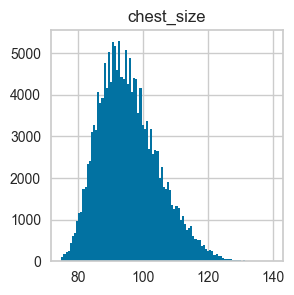

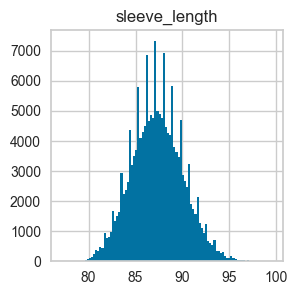

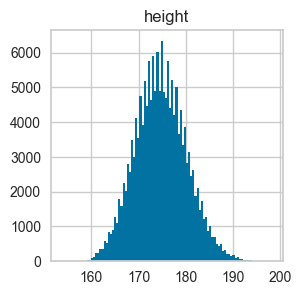

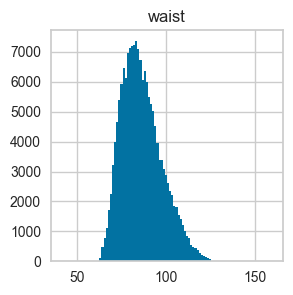

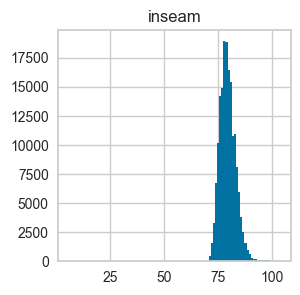

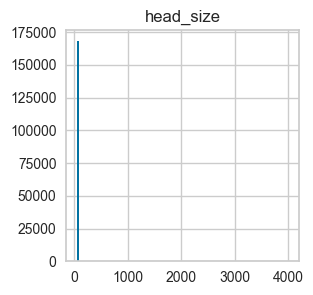

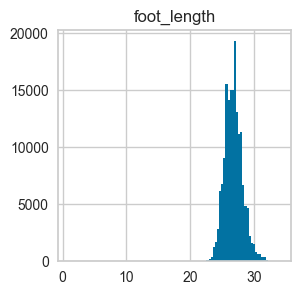

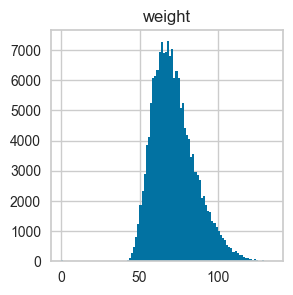

In [7]:
for col in data.columns:
    plt.figure(figsize=(3, 3))
    plt.hist(data[f"{col}"], bins=100)
    plt.title(f"{col}")
    plt.show();

# Setup

In [8]:
experiment = setup(
    data, 
    target='weight',
    use_gpu=True,
)

,Description,Value
0,session_id,4152
1,Target,weight
2,Original Data,"(167980, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(117585, 7)"


In [9]:
# Model Selection

model = compare_models(n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.8567,17.9697,4.2386,0.9046,0.0716,0.0401,12.7820
rf,Random Forest Regressor,3.0824,18.5375,4.3050,0.9016,0.0723,0.0433,12.9090
lightgbm,Light Gradient Boosting Machine,3.3774,20.4204,4.5185,0.8916,0.0749,0.0474,2.9810
xgboost,Extreme Gradient Boosting,3.3768,20.4330,4.5199,0.8916,0.0747,0.0474,0.8060
catboost,CatBoost Regressor,3.3830,20.5402,4.5318,0.8910,0.0748,0.0474,6.4660
gbr,Gradient Boosting Regressor,3.4172,20.9673,4.5786,0.8887,0.0755,0.0480,9.1270
knn,K Neighbors Regressor,3.6142,23.2555,4.8220,0.8766,0.0784,0.0508,1.2070
en,Elastic Net,3.6259,24.1866,4.9176,0.8717,0.0793,0.0510,0.0660
lasso,Lasso Regression,3.6284,24.2352,4.9225,0.8714,0.0794,0.0510,0.0660
br,Bayesian Ridge,3.6281,24.8990,4.9839,0.8679,0.0800,0.0510,0.0600


In [10]:
# Model Optimization

# tuned_model = tune_model(model)  -> Takes too long

In [11]:
# Finalize model
# finalized_model = finalize_model(tuned_model)
finalized_model = finalize_model(model)

# save model to disk
save_model(finalized_model, 'model_for_weight_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='weight',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    